<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 08 **
** ┗ Credit card trading data analysis **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Analysis of use of use by industry」
* 🥈SESSION 2 -「Core Industry Search」
* 🥇SESSION 3 -「Additional Analysis of Core Industries」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/08_Credit Card Transaction Data Analysis')
os.getcwd()

'/content/drive/MyDrive/DA portfolio/DA_colab/08_Credit Card Transaction Data Analysis'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 💳🏸 (marketer, service planner, strategic planning)

``
Company A plans to enter the store of new brands.Because it is a new brand, there is no information about the past business,
There are many concerns about which area to enter.After worrying, the candidate A was selected as the final candidate.
However, it is still questionable whether it is similar to the consumer tendency of their own brands and customers in the area.
Therefore, I would like to use the credit card Spending Data to identify the customer's tendency.
Compare the consumption tendency of the identified customer and the brand's tendency to make a final decision.

``


> ** Looking at the data **

* Store ID Card Spending Data
* Data specification ⬇

| Store_id | Date | Time | CARD_ID | AMOUNT | InstallMents |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Store ID | Date | Time | Card ID | Sales (Cancellation of Countermeasures) | Installation month, lump -sum is vacant
| DAY_OF_WEEK | HOLIDAY |
| Day (Monday 0, Sunday 6) | Whether it is a public holiday |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter08_credit_card_store.csv')
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Unidentified new brand business
``

> ** Expected effect **

``
▶ Determination of new commercial districts and identify customer consumption tendencies in commercial areas
``

> ** Solution **

``
▶ Card Spending Data Use area to determine the store by identifying customer consumption or consumption and matching with brands
▶ Session 1 🥉
-Credit card consumption by industry
▶ Session 2 🥈
-Definition of core industries after analysis
▶ Session 3 🥇
-Detailed analysis of core industries
``

> ** Performance measurement **

``
▶ Whether to enter a new entry
``

> ** Public application **

``
▶ Write and report Insight Report
``

> ** Main code preview **

``
▶ Session 1 → Fillna (), Round ()
▶ Session 2 → .APPLY (Lambda x :), SNS.CATPLOT (), ABS ()
▶ Session 3 → PIVOT_TABLE (), set_index ()
``


## ** 🥉Session 1 **
** ┗ Analysis of use of usage type **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 3,362,796 ROW, 8 COL
print('df', df.shape)

df (3362796, 8)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [ ]:
# ▶ Outlier confirmation, negative value check
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [ ]:
# ▶ Conversion to 0 because the lump sum is an empty sculpture in the installment month COL
df['installments'].fillna(0,inplace=True)

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


### · Use and sales proportion analysis by industry
---


In [ ]:
# ▶ There are a total of 1,775 universal shops
df['store_id'].value_counts()

,count
store_id,
0,68773
753,39318
105,36063
1342,33335
428,33285
...,...
1530,1
991,1
657,1


In [ ]:
# ▶ Portion of the number of uses by industry
df_store = pd.DataFrame(df['store_id'].value_counts()).reset_index()
df_store.columns = ['store_id', 'cnt']
df_store.head(5)

,store_id,cnt
0,0,68773
1,753,39318
2,105,36063
3,1342,33335
4,428,33285


In [ ]:
# ▶ Top 10
df_store['total'] = df_store['cnt'].sum()
df_store['ratio'] = round( (df_store['cnt'] / df_store['total']) * 100,2)
df_store.head(10)

,store_id,cnt,total,ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99
5,221,31409,3362796,0.93
6,161,27170,3362796,0.81
7,1038,25694,3362796,0.76
8,323,25221,3362796,0.75
9,1366,24946,3362796,0.74


In [ ]:
# ▶ The share of sales by industry (※ GROUPBY.SUM ())
df_amt = pd.DataFrame(df['amount'].groupby(df['store_id']).sum()).reset_index()
df_amt.head(5)

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312


In [ ]:
# ▶ Sort for lower sales
df_amt = df_amt.sort_values(by=['amount'], ascending=False)
df_amt.head(5)

,store_id,amount
746,753,9474601
1326,1342,7301327
158,161,5236075
0,0,5234611
948,958,4965728


In [ ]:
# ▶ Top 10 sales
df_amt['total'] = df_amt['amount'].sum()
df_amt['ratio'] = round( (df_amt['amount'] / df_amt['total']) * 100,2)
df_amt.head(10)

,store_id,amount,total,ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01
1065,1076,4860885,490841453,0.99
801,810,3677501,490841453,0.75
1013,1024,3330293,490841453,0.68
480,486,3235482,490841453,0.66
590,597,2999180,490841453,0.61


## ** 🥈Session 2 **
** ┗ Core industry search **
---


### · Analysis of customer use by industry
---


In [ ]:
# ▶ DATA
df_store.columns = ['store_id', 'cnt', 'cnt_total', 'cnt_ratio']
df_store.head(5)

,store_id,cnt,cnt_total,cnt_ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99


In [ ]:
# ▶ DATA
df_amt.columns = ['store_id', 'amt', 'amt_total', 'amt_ratio']
df_amt.head(5)

,store_id,amt,amt_total,amt_ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01


In [ ]:
# ▶ Data merge
df_merge = pd.merge(df_store, df_amt , how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07
1,753,39318,3362796,1.17,9474601,490841453,1.93
2,105,36063,3362796,1.07,2991082,490841453,0.61
3,1342,33335,3362796,0.99,7301327,490841453,1.49
4,428,33285,3362796,0.99,1312204,490841453,0.27


In [ ]:
# ▶ UNIQUE
df_customer = pd.DataFrame(df['card_id'].groupby(df['store_id']).nunique()).reset_index()
df_customer.columns = ['store_id', 'customer']
df_customer['customer_total'] = df['card_id'].nunique()
df_customer['customer_ratio'] = round((df_customer['customer'] / df_customer['customer_total'])*100,2)
df_customer.head(5)

,store_id,customer,customer_total,customer_ratio
0,0,12727,922522,1.38
1,1,8,922522,0.00
2,2,9053,922522,0.98
3,3,231,922522,0.03
4,4,1176,922522,0.13


In [ ]:
# ▶ Sorting the number of customers using the number of customers
df_customer.sort_values(by=['customer_ratio'], ascending = False).head(10)

,store_id,customer,customer_total,customer_ratio
423,428,18456,922522,2.00
218,221,17161,922522,1.86
289,293,14915,922522,1.62
1326,1342,14789,922522,1.60
932,942,13760,922522,1.49
1196,1209,13512,922522,1.46
0,0,12727,922522,1.38
1027,1038,12523,922522,1.36
746,753,11960,922522,1.30
123,126,11070,922522,1.20


In [ ]:
# ▶ Number of customers
df_merge = pd.merge(df_merge, df_customer, how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00


### · One time usage / price analysis
---


In [ ]:
# ▶ One amount
df_merge['amt_per_use'] = round(df_merge['amt'] / df_merge['cnt'],0)

# ▶ Guest price
df_merge['cus_per_use'] = round(df_merge['amt'] / df_merge['customer'],0)

df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0


### · Definition of core industries
---


In [ ]:
# ▶ Define new score by applying weights to the proportion of usage, the share of the amount used, and the number of customers used.
# ▶ cnt_ratio(a)
# ▶ amt_ratio(b)
# ▶ customer_ratio(c)

a = 0.3
b = 0.35
c = 0.35

df_merge['core_store'] = df_merge['cnt_ratio']*a + df_merge['amt_ratio']*b + df_merge['customer_ratio']*c
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915


In [ ]:
# ▶ Converted to a score of 100 points through min-max standardization
df_merge['core_store_scaled'] = df_merge['core_store'].apply(lambda x: (x - df_merge['core_store'].min())  / (df_merge['core_store'].max() - df_merge['core_store'].min()) )
df_merge['core_store_scaled'] = round(df_merge['core_store_scaled'] * 100,0)
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460,57.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


In [ ]:
# ▶ Store ID = 753, 0, 1342, 221, 428
df_merge.sort_values(by=['core_store_scaled'], ascending=False).head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,80.0,146.0,1.1085,75.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


## ** 🥇Session 3 **
** ┗ Core industry additional analysis **
---


###, core business weekend/weekdays/public holidays analysis
---


In [ ]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [ ]:
# ▶ Bring only the core industry data defined by the top
df_core_store = df[df['store_id'].isin([753, 0, 1342, 221, 428])]
df_core_store['store_id'].value_counts()

,count
store_id,
0,68773
753,39318
1342,33335
428,33285
221,31409


In [ ]:
# ▶ Check data for each day of the week
df_core_store['days_of_week'].value_counts()

,count
days_of_week,
5,32850
6,30772
4,29282
2,28635
3,28269
1,28159
0,28153


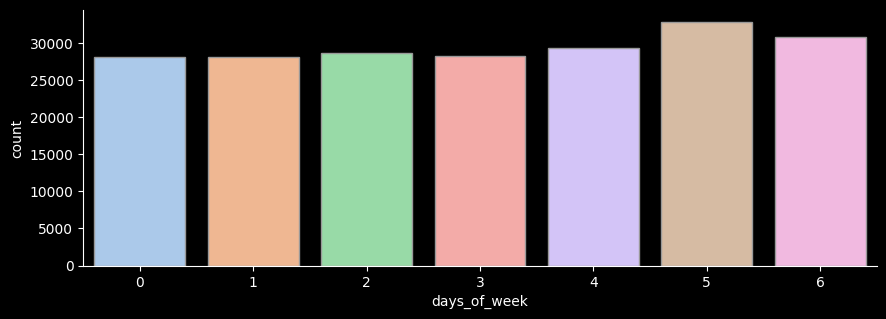

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 0-Monday, ..., 5-Saturday, 6-Sunday
# ▶ 1st place on Saturday, 2nd on Sunday ..
sns.catplot(x="days_of_week", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [ ]:
# ▶ Weekend (1), weekday (0) comparison of consumption
import numpy as np
df_core_store['weekend'] = np.where(df_core_store['days_of_week'].isin([5,6]), 1, 0)
df_core_store['weekend'].value_counts()

,count
weekend,
0,142498
1,63622


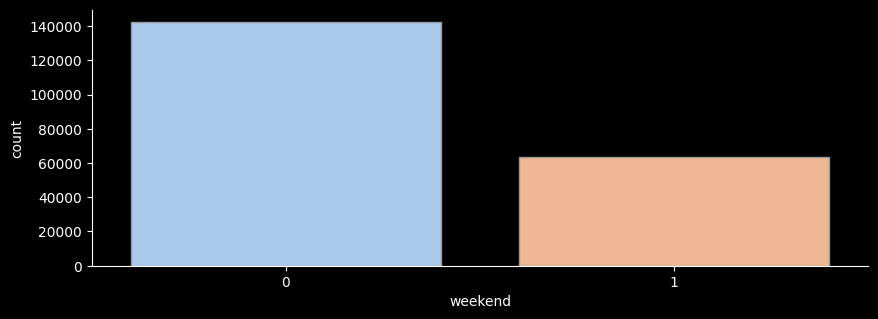

In [ ]:
# ▶ Weekend (1), weekday (0) Plotting
sns.catplot(x="weekend", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

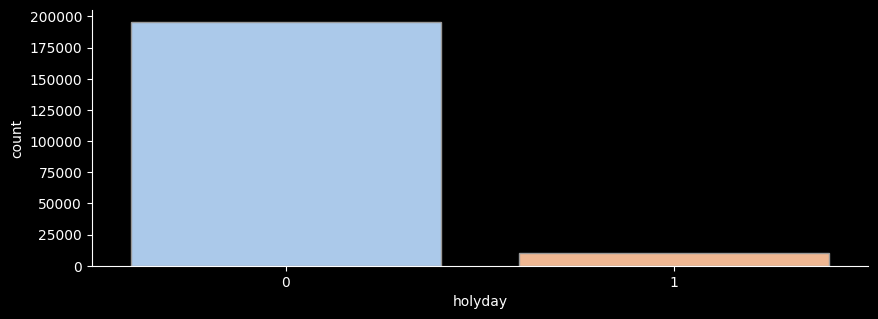

In [ ]:
# ▶ Comparison of the number of core industries consumption according to HOLYDAY (holidays)
sns.catplot(x="holyday", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

### · Lump sum and installment payment analysis
---


In [ ]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


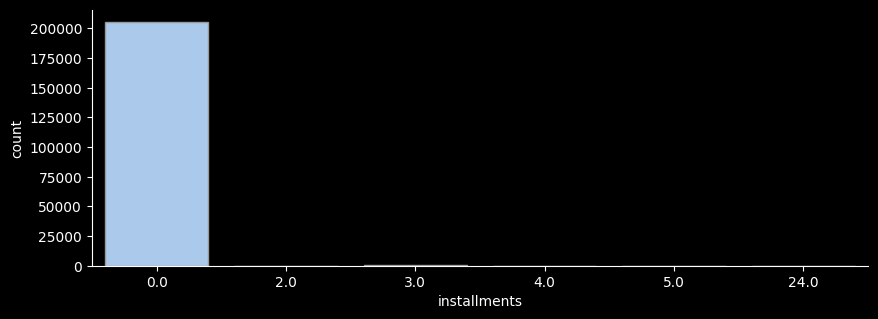

In [ ]:
# ▶ 0- Lump sum, other than Non-month installment
sns.catplot(x="installments", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [ ]:
# ▶ More than 99% of the lump sum WOW
df_core_store['installments'].value_counts()

,count
installments,
0.0,205454
3.0,477
2.0,172
5.0,12
24.0,3
4.0,2


### · Analysis of the cancellation amount
---


In [ ]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [ ]:
# ▶ 0.8% share
abs(df_core_store[df_core_store['amount'] < 0]['amount'].sum()) / df_core_store['amount'].sum() * 100

np.float64(0.8132183681150494)

In [ ]:
# ▶ 753, 0, 1342, 221, 428
# ▶ 'Store 0'
df1 = df_core_store[df_core_store['store_id']==753]
df2 = df_core_store[df_core_store['store_id']==0]
df3 = df_core_store[df_core_store['store_id']==1342]
df4 = df_core_store[df_core_store['store_id']==221]
df5 = df_core_store[df_core_store['store_id']==428]


print("store(753) :", abs(df1[df1['amount'] < 0]['amount'].sum()) / df1['amount'].sum() * 100)
print("store(0) :", abs(df2[df2['amount'] < 0]['amount'].sum()) / df2['amount'].sum() * 100)
print("store(1342) :", abs(df3[df3['amount'] < 0]['amount'].sum()) / df3['amount'].sum() * 100)
print("store(221) :", abs(df4[df4['amount'] < 0]['amount'].sum()) / df4['amount'].sum() * 100)
print("store(428) :", abs(df5[df5['amount'] < 0]['amount'].sum()) / df5['amount'].sum() * 100)

store(753) : 0.38674979558505945
store(0) : 1.396741801826344
store(1342) : 0.5834555828002225
store(221) : 1.7059220251109624
store(428) : 1.1333603616510848


### · Analysis of sales weights by year
---


In [ ]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [ ]:
# ▶ Time data processing
import datetime
df_core_store['Date_merge'] = df['date'].astype(str) + ' ' + df['time'].astype(str)
df_core_store['Date_merge'] = pd.to_datetime(df_core_store['Date_merge'])

In [ ]:
# ▶ Data from August 1, 2016 to July 31, 2018
df_core_store['Date_merge'].min(), df_core_store['Date_merge'].max()

(Timestamp('2016-08-01 00:14:51'), Timestamp('2018-07-31 23:56:14'))

In [ ]:
# ▶ Time data decomposition to the year, month
df_core_store['year'] = df_core_store['Date_merge'].dt.year
df_core_store['month'] = df_core_store['Date_merge'].dt.month
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016-12-19 13:31:08,2016,12


In [ ]:
# ▶ Sales for each core industry by year
df_year = pd.DataFrame(df_core_store.groupby(['store_id', 'year'])['amount'].sum()).reset_index()
df_year.head(6)

,store_id,year,amount
0,0,2016,137336
1,0,2017,3235476
2,0,2018,1861799
3,221,2016,528397
4,221,2017,1318231
5,221,2018,666617


In [ ]:
df_pivot = pd.pivot_table(df_year,             # Pivot data frame
                      index = 'year',          # Passes in the line
                      columns = 'store_id',    # Heat to enter the column position
                      values = 'amount')       # Open to be used as data
# ▶ Step 1
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 2
df_pivot = df_pivot.set_index('year')

# ▶ Step 3
df_pivot = df_pivot.fillna(0)

# ▶ Step 4
df_pivot['total'] = df_pivot.iloc[:,0] + df_pivot.iloc[:,1] + df_pivot.iloc[:,2] + df_pivot.iloc[:,3] + df_pivot.iloc[:,4]

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,137336.0,528397.0,305336.0,525324.0,0.0,1496393.0
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0,18461950.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0,5877645.0


In [ ]:
# ▶ Converted into sales share by dividing it into total amount
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000,1496393.0
2017,0.175251,0.071403,0.036021,0.440349,0.276977,18461950.0
2018,0.316759,0.113416,0.058163,0.139440,0.372223,5877645.0


In [ ]:
df_pivot = df_pivot.drop(['total'], axis=1)
df_pivot

,0,221,428,753,1342
year,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000
2017,0.175251,0.071403,0.036021,0.440349,0.276977
2018,0.316759,0.113416,0.058163,0.139440,0.372223


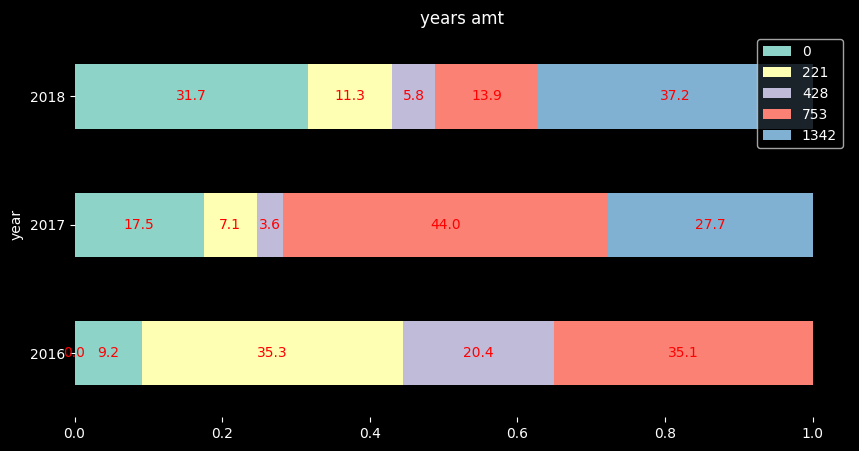

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='r');

plt.box(False)
plt.gcf().set_size_inches(10, 5)
plt.show()